# <center>EPOCH - Task 2<center>

## <font color=blue>Importing Necessary Packages</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import os
import cv2
from pathlib import Path
from PIL import Image

print('imported')

imported


In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import nltk
from nltk.corpus import wordnet
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

## <font color=blue>1. Extracting Text From Image</font>

### 1.1. Importing And Preprocessing Of Data For Alphabet Recognition 

In [4]:
# Import and preprocess images.

path="alphabet_images"

# Order files in alphabetic order.
sorted_filenames=sorted(os.listdir(path))

# Inititate image list.
train_images=[]

# Iterator for reference.
i=0

# loop over every image.
for image in sorted_filenames:
    # Preprocess each image and add to list.
    img=cv2.imread(path+'/'+image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(28,28))
    img=np.array(img)
    train_images.append(img)
    i+=1
    if i % 10000 == 0:
        print(i)

# Normalize pixels.
X=np.array(train_images)
X=X.astype('float32')
X/=255

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000


In [5]:
# Import labels.
labels_df=pd.read_csv('alphabet_labels.csv')

# Sort labels according to alphabetic order of image name.
labels_df=labels_df.sort_values(by='file')
train_labels=labels_df['label'].tolist()

# Preprocess and hot-encode labels. (use ascii instead of labelencoder to maintain ordering for personal comfort)
y=[ord(i)-65 for i in train_labels]
y = tf.keras.utils.to_categorical(y, num_classes=27)

In [6]:
print(X.shape)
print(y.shape)

(372451, 28, 28)
(372451, 27)


In [7]:
# Split data into train and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=45)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(297960, 28, 28)
(297960, 27)
(74491, 28, 28)
(74491, 27)


### 1.2. Designing And Training The Model For Alpabet Recognition

In [8]:
#Design ar(alphabet recognizing) model.
ar_model = Sequential()

ar_model.add(InputLayer(shape=(28,28,1)))
ar_model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
ar_model.add(MaxPooling2D(pool_size=(2, 2)))
ar_model.add(Dropout(0.25))

ar_model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
ar_model.add(MaxPooling2D(pool_size=(2, 2)))
ar_model.add(Dropout(0.25))

ar_model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))

ar_model.add(Flatten())

ar_model.add(Dense(64, activation="relu"))
ar_model.add(Dropout(0.25))

ar_model.add(Dense(27, activation="softmax"))

In [9]:
#Compile model.
ar_model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

In [10]:
# Define early stopping.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Train model.
history = ar_model.fit(
    X_train,
    y_train, 
    validation_data=(X_val,y_val),
    batch_size=500,
    epochs=25,
    callbacks=[early_stopping]
)

Epoch 1/25
596/596 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.7260 - loss: 0.9793 - val_accuracy: 0.9745 - val_loss: 0.0944
Epoch 2/25
596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 138ms/step - accuracy: 0.9543 - loss: 0.1615 - val_accuracy: 0.9817 - val_loss: 0.0688
Epoch 3/25
596/596 ━━━━━━━━━━━━━━━━━━━━ 85s 143ms/step - accuracy: 0.9657 - loss: 0.1204 - val_accuracy: 0.9850 - val_loss: 0.0560
Epoch 4/25
596/596 ━━━━━━━━━━━━━━━━━━━━ 87s 146ms/step - accuracy: 0.9724 - loss: 0.0983 - val_accuracy: 0.9856 - val_loss: 0.0522
Epoch 5/25
596/596 ━━━━━━━━━━━━━━━━━━━━ 87s 147ms/step - accuracy: 0.9759 - loss: 0.0850 - val_accuracy: 0.9863 - val_loss: 0.0501
Epoch 6/25
596/596 ━━━━━━━━━━━━━━━━━━━━ 88s 148ms/step - accuracy: 0.9776 - loss: 0.0789 - val_accuracy: 0.9873 - val_loss: 0.0471
Epoch 7/25
596/596 ━━━━━━━━━━━━━━━━━━━━ 87s 145ms/step - accuracy: 0.9794 - loss: 0.0706 - val_accuracy: 0.9877 - val_loss: 0.0440
Epoch 8/25
596/596 ━━━━━━━━━━━━━━━━━━━━ 87s 145ms/step - accuracy: 0.9808 - loss: 0

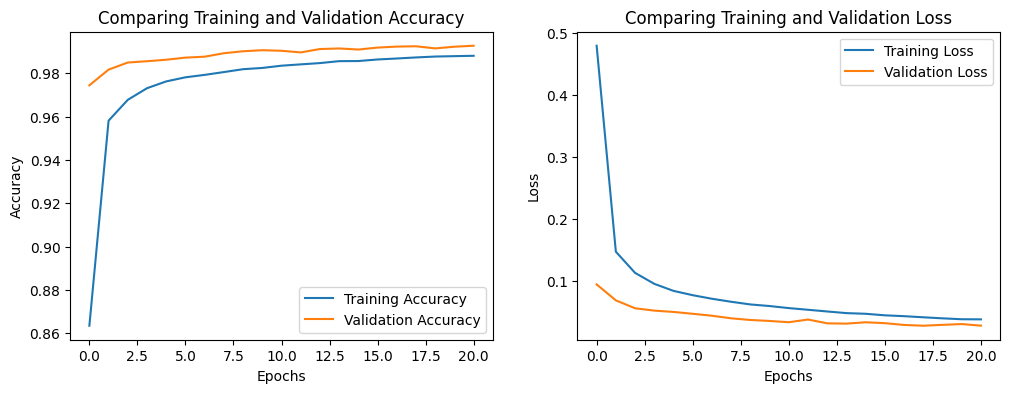

In [11]:
history_dict = history.history

# Plot the training and validation loss
plt.figure(figsize=(12, 4))

# Plot the training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Comparing Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Comparing Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


#### The graphs indicate good performance. The training and validation accuracies are both high and close to each other which is good and representative of no overfitting. Low and decreasing losses is also representative of good performance. The validation accuracy being higher, and validation loss being lower indicates effective generalization of the model.

### 1.3. Converting Images Into Text

In [12]:
# Function to cut given image into patches containing each letter.
# The following function cuts any given image into a 12/13 by 10 grid based on height.
def cut_image_into_patches(image_path, num_patches_height, num_patches_width=10):

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape

    # Calculate patch dimensions.
    patch_width = width // num_patches_width
    patch_height = height // num_patches_height

    patches = []

    # Loop over the image and create patches. 
    for j in range(num_patches_height):
        for i in range(num_patches_width):
            # Calculate the coordinates for the current patch.
            left = i * patch_width
            upper = j * patch_height
            right = min(left + patch_width, width)
            lower = min(upper + patch_height, height)

            # Crop the patch from the image.
            patch = image[upper:lower, left:right]

            # Add the patch to the list.
            patches.append(patch)

    return patches


In [55]:
#Function to predict text in a given image.
def predict_text_in_image(image_path):

    # Load image
    image=Image.open(image_path)

    # According to image dimensions, cut image into patches.
    w,h=image.size
    if h==336:
        patches = cut_image_into_patches(image_path,12)
    else:
        patches = cut_image_into_patches(image_path,13)

    # Preprocess patches.
    np_patches=[]
    for patch in patches:
        patch=np.array(patch)
        patch=cv2.resize(patch,(28,28))
        np_patches.append(patch)
    np_patches=np.array(np_patches)
    np_patches=np_patches.astype('float32')
    np_patches/=255

    # Predict patches' labels using the trained model.
    pred=ar_model.predict(np_patches)

    # Convert predicted values into text format.
    predictions=[]
    for i in pred:
        l=np.argmax(i)
        # Cutoff for 'space' character. (as image is not trained on any spaces)
        if i[26]>10**(-7) and i[l]<0.5:
            predictions.append(' ')
        else:
            l=int(l)
            predictions.append(chr(l+65))

    # Concatenate characters into final text.
    pred_text=''
    for i in predictions:
        pred_text+=i
        
    return pred_text

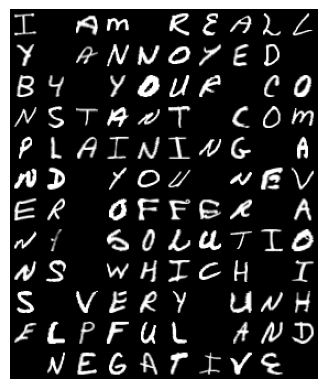

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
The above image reads: I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFEER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATIVE 


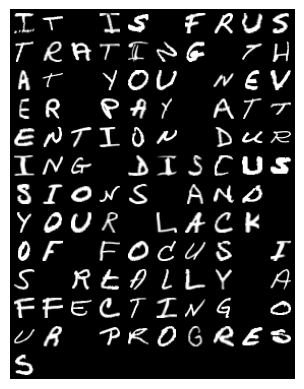

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
The above image reads: IT IS FRUSTRATING THAT YOU NEVER PAY ATTENTION DURING DISCUSSIONS AND YOUR LACK OF FOCUS IS REALLY AFFECTING OUR PROGRESS         


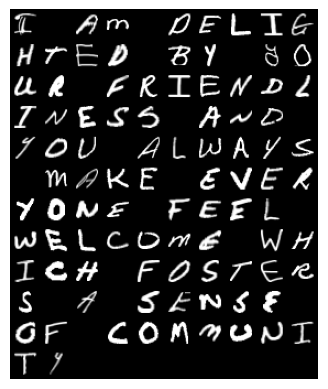

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
The above image reads: I AM DELIGHTED BY YOUR FRIENDLINESS AND YOU ALWAYS MAKE EVERYONE FEEL WELCOME WHICH FOSTERS A SENSE OF COMMUNITY        


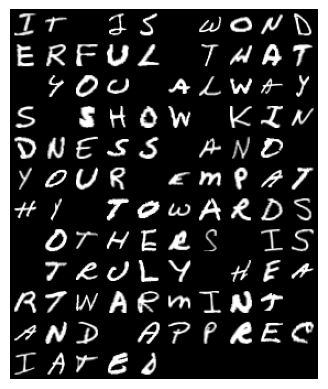

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
The above image reads: IT JS WONDERFUL THAT YOU ALWAYS SHOW KINDNESS AND YOUR EMPATHY TOWARDS OTHERS IS TRULY HEARTWARMING AND APPRECIATED     


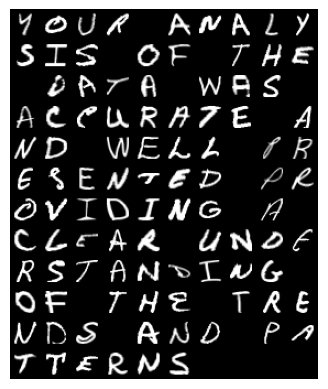

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
The above image reads: YOUR ANALYSIS OF THE DATA WAS ACCURATE AND WELL PRESENTED PROVIDING A CLEAR UNDERSTANDING OF THE TRENDS AND PATTERNS    


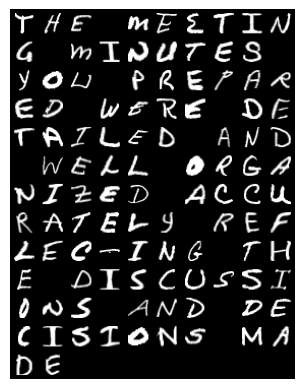

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
The above image reads: THE MEETING MINUTES YOW PREPARED WERE DETAILED AND WELL ORGANIZED ACCURATELY REFLECTING THE DISCUSSIONS AND DECISIONS MADE        


In [56]:
# Test trained CNN model on target images to predict text.
for i in range(1,7):
    img_path = 'test_images/line_'+str(i)+'.png'

    # Plot image.
    image = cv2.imread(img_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Predict and print text.
    text=predict_text_in_image(img_path)
    print(f'The above image reads: {text}')

## <font color=blue>2. Sentimental Analysis Using RNN and LSTM</font>

### 2.1. Importing And Preprocessing Data

In [19]:
# Import data.
data=pd.read_csv('sentiment_analysis_dataset.csv')
print(data)
lines=data['line'].tolist()
sent=data['sentiment'].tolist()

                                                 line sentiment
0   I AM REALLY FRUSTRATED BECAUSE YOU CONSTANTLY ...     Angry
1   IT MAKES ME UPSET THAT YOU NEVER TAKE RESPONSI...     Angry
2   I CANNOT BELIEVE YOU MISSED ANOTHER DEADLINE A...     Angry
3   IT ANNOYS ME WHEN YOU INTERRUPT DURING MEETING...     Angry
4   I AM TIRED OF YOUR EXCUSES EVERY TIME SOMETHIN...     Angry
5   IT UPSETS ME THAT YOU ALWAYS ARRIVE LATE AND Y...     Angry
6   I AM REALLY ANGRY BECAUSE YOU NEVER PREPARE FO...     Angry
7   IT INFURIATES ME THAT YOU NEVER APPRECIATE THE...     Angry
8   I CANNOT STAND HOW YOU ALWAYS TALK DOWN TO PEO...     Angry
9   IT IS VERY DISAPPOINTING THAT YOU NEVER FOLLOW...     Angry
10  I AM VERY HAPPY BECAUSE YOU ALWAYS LISTEN CARE...     Happy
11  IT IS WONDERFUL HOW YOU ALWAYS COME PREPARED A...     Happy
12  I APPRECIATE HOW YOU ALWAYS OFFER TO HELP AND ...     Happy
13  IT IS FANTASTIC THAT YOU ALWAYS HAVE A POSITIV...     Happy
14  I AM GRATEFUL FOR YOUR SUPPORT AND Y

In [20]:
# Label encode the labels.
label_encoder = preprocessing.LabelEncoder()
sent_y = label_encoder.fit_transform(sent)

# One-hot encode the labels.
sent_y = tf.keras.utils.to_categorical(sent_y, num_classes=3)

In [21]:
# Functions for preprocessing text/lines.

#Remove stopwords.
stop_words = set(stopwords.words('english'))

# Add custom stop words.
custom_stop_words={'really'}
stop_words.update(custom_stop_words)

# Function to remove stopwords.
def remove_stopwords(sentence, stop_words):
    words = sentence.split()
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

In [22]:
# Function to lemmatize line. (additionally split words containing 'well', eg: wellwritten)
def lemmatize_line(line):
    tokenized_uneditted=word_tokenize(line)
    tokenized=[]
    for word in tokenized_uneditted:
        if word.startswith('well'):
            tokenized.append('well')
            tokenized.append(word[4:])
        else:
            tokenized.append(word)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]  
    lemmatized = ' '.join(words)
    return lemmatized

In [23]:
# Function for pos (part of speech) tagging.
def get_part_of_speech(word):
  probable_part_of_speech = wordnet.synsets(word)
  
  pos_counts = Counter()

  pos_counts["n"] = len([item for item in probable_part_of_speech if item.pos()=="n"])
  pos_counts["v"] = len([item for item in probable_part_of_speech if item.pos()=="v"])
  pos_counts["a"] = len([item for item in probable_part_of_speech if item.pos()=="a"])
  pos_counts["r"] = len([item for item in probable_part_of_speech if item.pos()=="r"])
  
  most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_likely_part_of_speech


In [24]:
# Preprocess text/lines.

lines=[line.lower() for line in lines]

# Remove stopwords.
lines=[remove_stopwords(line,stop_words) for line in lines]

# Lemmatize lines.
lines=[lemmatize_line(line) for line in lines]

# Define and fit tokenizer.
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(lines)

# Convert texts to sequences of integers.
sequences = tokenizer.texts_to_sequences(lines)

# Pad sequences to ensure they all have the same length.
maxlen = 10
sent_X = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [25]:
print(sent_X.shape)
print(sent_y.shape)

(30, 10)
(30, 3)


In [26]:
# Split data into train and validation sets.
sa_X_train,sa_X_val,sa_y_train,sa_y_val=train_test_split(sent_X,sent_y,test_size=0.15,random_state=42)

print(sa_X_train.shape)
print(sa_y_train.shape)
print(sa_X_val.shape)
print(sa_y_val.shape)

(25, 10)
(25, 3)
(5, 10)
(5, 3)


### 2.2. Designing and Training Model

In [50]:
# Design the sa (sentimental analysis) model.
sa_model = Sequential()
sa_model.add(layers.Embedding(max_features, 128))
sa_model.add(layers.LSTM(64, return_sequences=True))
sa_model.add(Dropout(0.5))
sa_model.add(layers.LSTM(64, return_sequences=True))
sa_model.add(Dropout(0.5))
sa_model.add(layers.SimpleRNN(64))
sa_model.add(Dropout(0.25))
sa_model.add(layers.Dense(3, activation='softmax'))

In [51]:
# Compile model.
sa_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
# Train model.
sa_model.fit(sa_X_train, sa_y_train,
                    epochs=5,
                    batch_size=3,
                    validation_data=(sa_X_val,sa_y_val))

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.3534 - loss: 1.1033 - val_accuracy: 0.4000 - val_loss: 1.0888
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6799 - loss: 1.0637 - val_accuracy: 0.4000 - val_loss: 1.0768
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5283 - loss: 1.0272 - val_accuracy: 0.8000 - val_loss: 1.0029
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7860 - loss: 0.8949 - val_accuracy: 0.6000 - val_loss: 0.6246
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8876 - loss: 0.4876 - val_accuracy: 0.8000 - val_loss: 0.4738


#### Note: Due to insufficient dataset, the sentiment predicting model is poor. However, the preprocessing and design model have still managed to give a decent performance.

### 2.3. Predicting Sentiment Of Text In Images

In [30]:
# Function to predict sentiment of given texts.
def predict_sentiment(texts, maxlen = maxlen):

    # Preprocess target text.
    texts=[line.lower() for line in texts]
    texts=[remove_stopwords(line,stop_words) for line in texts]
    texts=[lemmatize_line(line) for line in texts]
    sequences = tokenizer.texts_to_sequences(texts)
    data = sequence.pad_sequences(sequences, maxlen=maxlen,padding='post')

    # Predict sentiment
    prediction = sa_model.predict(data)
    print(prediction)
    prediction = np.argmax(prediction,axis=1)
    predicted_labels = label_encoder.inverse_transform(prediction)

    return predicted_labels

In [31]:
# Function to predict sentiment of text in given image.
def predict_sentiment_from_image(image_path):
    text = predict_text_in_image(image_path)
    sentiment = predict_sentiment([text])
    return text, sentiment

## <font color=blue>3. Model Performance And Results</font>

In [32]:
# Import correct test labels.
target_labels_df=pd.read_csv('target_labels.csv')
test_labels=np.array(target_labels_df['sentiment'])

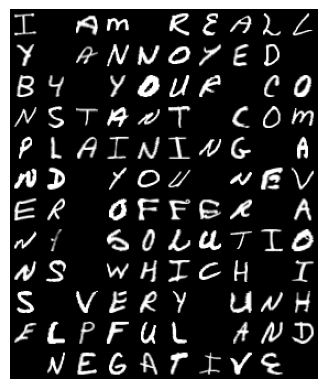

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.45804867 0.3819451  0.16000633]]
The above image reads: I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFEER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATIVE 
The sentiment of the text in the above image is ['Angry']


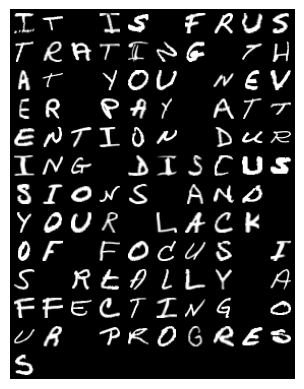

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.50540435 0.13115938 0.36343634]]
The above image reads: IT IS FRUSTRATING THAT YOU NEVER PAY ATTENTION DURING DISCUSSIONS AND YOUR LACK OF FOCUS IS REALLY AFFECTING OUR PROGRESS         
The sentiment of the text in the above image is ['Angry']


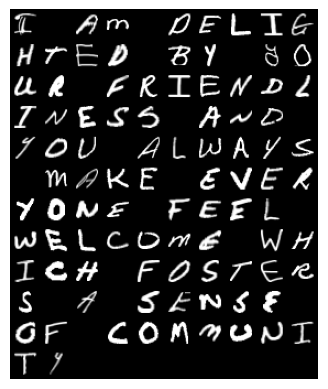

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.03278882 0.96418035 0.00303086]]
The above image reads: I AM DELIGHTED BY YOUR FRIENDLINESS AND YOU ALWAYS MAKE EVERYONE FEEL WELCOME WHICH FOSTERS A SENSE OF COMMUNITY        
The sentiment of the text in the above image is ['Happy']


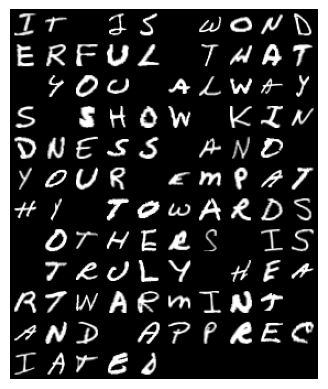

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.05235526 0.9415805  0.00606432]]
The above image reads: IT JS WONDERFUL THAT YOU ALWAYS SHOW KINDNESS AND YOUR EMPATHY TOWARDS OTHERS IS TRULY HEARTWARMING AND APPRECIATED     
The sentiment of the text in the above image is ['Happy']


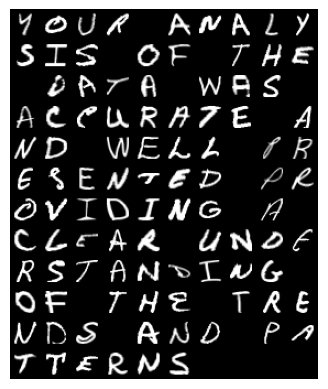

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.14433697 0.00612941 0.8495337 ]]
The above image reads: YOUR ANALYSIS OF THE DATA WAS ACCURATE AND WELL PRESENTED PROVIDING A CLEAR UNDERSTANDING OF THE TRENDS AND PATTERNS    
The sentiment of the text in the above image is ['Neutral']


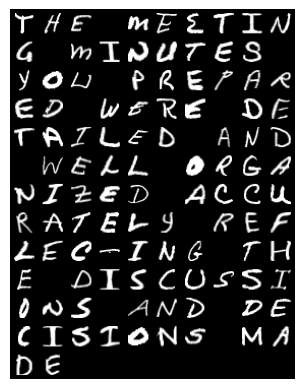

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.4234594 0.1097208 0.4668198]]
The above image reads: THE MEETING MINUTES YOW PREPARED WERE DETAILED AND WELL ORGANIZED ACCURATELY REFLECTING THE DISCUSSIONS AND DECISIONS MADE        
The sentiment of the text in the above image is ['Neutral']


In [57]:
# Predict sentiment of text in target images using the trained CNN and RNN + LSTM model.
predicted_labels=[]
for i in range(1,7):
    img_path = 'test_images/line_'+str(i)+'.png'
    img=cv2.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    text, sentiment = predict_sentiment_from_image(img_path)
    predicted_labels.append(sentiment)
    print(f'The above image reads: {text}')
    print(f'The sentiment of the text in the above image is {sentiment}')

In [58]:
# Calculate accuracy.
total=len(test_labels)
correct=0.0
for i in range(total):
    if test_labels[i]==predicted_labels[i]:
        correct+=1
test_accuracy = correct/total
print(f'The accuracy of the above trained CNN and RNN + LSTM model on test_images is {test_accuracy}.')

The accuracy of the above trained CNN and RNN + LSTM model on test_images is 1.0.


### Overall, the trained CNN model along with the trained RNN + LSTM model on the given target images has performed with an accuracy of 1.0.

### However, it is important to note that the performance of the RNN+LSTM model is actually not efficient. The scores for the respective sentiments are not that far apart (refer to the values given along with the predictions), and the model is not confident in its predictions. The small dataset plays a major factor in the model's lack of efficiency.